# **PHYS 434: Lab 2**, _Section AD_, _Gautam Kovoor_

## Problem 1

In [221]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy
import math
from scipy.stats import poisson
from scipy.stats import rayleigh
from scipy.stats import norm

A poisson distribution is a discrete probability distribution that models the frequency at which events occur in a given time period. In this problem we look at two poisson distributions, one for the average background of cosmic-rays and for the average number of gamma-rays emitted. Both distributions are within a period of 1 day.

We take the mean for the average cosmic-rays to be 5, and for the average gamma-rays to be 8. An important fact to remember here is that both distributions are independent random variables and we can therefore use the convolution operator to find the sum of the two random variables.

For a single day:

$$X = Poisson(\lambda_1)$$
$$Y = Poisson(\lambda_2)$$
- Here $\lambda$ represents the mean number of occurences in the given time period.

Below we use the convolution operator to find the Poisson Distribution of X for more days.

$$ X + X = Poisson(\lambda_1 + \lambda_1)$$

So for two days our new Poisson Distribution would be the sum of two Poisson Distributions for 1 Day.

$$ X + X = Poisson(5 + 5) = Poisson(10)$$

For three days our new Poisson Distribution would be the sum of the Poisson Distrubtion for 1 Day and 2 Days.

$$ 2X + X = Poisson(10 + 5) = Poisson(15)$$

Let us test this out below.

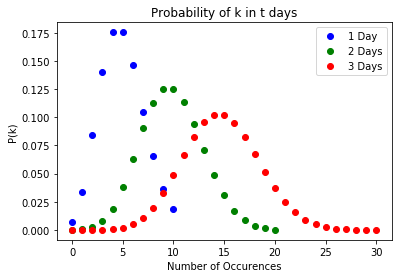

In [222]:
# 1A)
x = 5
y = 8

# Multiply the number of occurrences by the number of days because we are summing the number of days.
xRange = np.arange(0, 11, 1)
oneDay = poisson.pmf(xRange, x)
plt.plot(xRange, oneDay, 'bo', label='1 Day')

twoDays = np.convolve(oneDay, oneDay)
xRange2 = np.arange(0, 21, 1)
plt.plot(xRange2, twoDays, 'go', label='2 Days')

threeDays = np.convolve(twoDays, oneDay)
xRange3 = np.arange(0, 31, 1)
plt.plot(xRange3, threeDays, 'ro', label='3 Days')

plt.title('Probability of k in t days')
plt.ylabel('P(k)')
plt.xlabel('Number of Occurences')
plt.legend()
plt.show()

k represents the number of occurrences we are observing in a given interval.
$\lambda$ represents the average number of occurences in a given interval.

The probability of more than 10 occurences occurring in a single day is fairly slim so we will keep the range of our occurences to 10.

When we increase the number of days, we have to increase the interval for k as we are summing the number of days. Notice that as we increases the number of days, our value for $\lambda$ increases so it appears that the distribution is elongating.

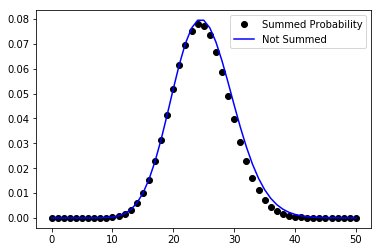

In [223]:
# 1B)
fourDays = np.convolve(threeDays, oneDay)
fiveDays = np.convolve(fourDays, oneDay)
xRange5 = np.arange(0, 51, 1)
plt.plot(xRange5, fiveDays, 'ko', label='Summed Probability')

# Alternative Calculation
mu = 5*5
plt.plot(xRange5, poisson.pmf(xRange5, mu), 'b-', label='Not Summed')

plt.legend()
plt.show()

The poisson distribution models discrete events/occurences where we only know the average time between events occurring, it also assumes that events are independent.

In the above plot we see that the sum of two random poisson variables follows the model of a poisson distribution. The sum of two independent poisson variables is a poisson variable because the distribution is still centered around $\lambda$ and follows the trend of increasing as $\lambda$ is small, and the decreasing as $\lambda$ is large.

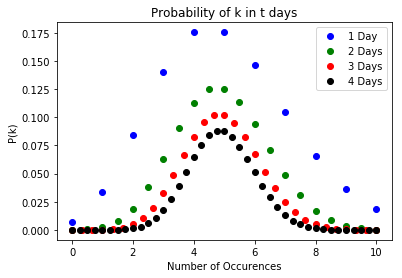

In [224]:
# 1C)
x = 5
y = 8

# We divide the range of our x values by the number of days, to normalize the distribution.
xRange = np.arange(0, 11, 1)
oneDay = poisson.pmf(xRange, x)
plt.plot(xRange, oneDay, 'bo', label='1 Day')

twoDays = np.convolve(oneDay, oneDay)
xRange2 = np.arange(0, 21, 1)
plt.plot(xRange2/2, twoDays, 'go', label='2 Days')

threeDays = np.convolve(twoDays, oneDay)
xRange3 = np.arange(0, 31, 1)
plt.plot(xRange3/3, threeDays, 'ro', label='3 Days')

fourDays = np.convolve(threeDays, oneDay)
xRange4 = np.arange(0, 41, 1)
plt.plot(xRange4/4, fourDays, 'ko', label='4 Days')

plt.title('Probability of k in t days')
plt.ylabel('P(k)')
plt.xlabel('Number of Occurences')
plt.legend()
plt.show()

The Central Limit Theorem states that normalize the sum of our independent random variables will cause the plot to asssume that of the normal distribution as sample size increases.

We can see in the above plot that as we increase the sample size, the distribution becomes more symmetric around the mean and assumes a bell shape. Our mean is 5, and the plots above are becoming more and more centered around 5.

## Problem 2

For Problem 2, we are going to take a look at a continuous distribution. The Rayleigh Distribution is one we haven't explored yet, and we will be using this to model the average number of cosmic rays.

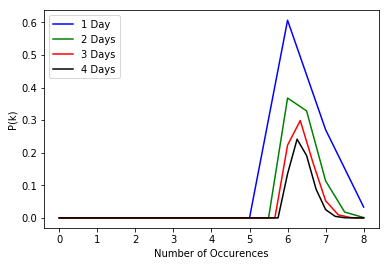

In [225]:
mu = 5

xRange = np.arange(0, 9, 1)
oneDay = rayleigh.pdf(xRange, mu)
plt.plot(xRange, oneDay, 'b-', label='1 Day')

twoDays = np.convolve(oneDay, oneDay)
xRange2 = np.arange(0, 17, 1)
plt.plot(xRange2/2, twoDays, 'g-', label='2 Days')

threeDays = np.convolve(twoDays, oneDay)
xRange3 = np.arange(0, 25, 1)
plt.plot(xRange3/3, threeDays, 'r-', label='3 Days')

fourDays = np.convolve(threeDays, oneDay)
xRange4 = np.arange(0, 33, 1)
plt.plot(xRange4/4, fourDays, 'k-', label='4 Days')

plt.ylabel('P(k)')
plt.xlabel('Number of Occurences')
plt.legend()
plt.show()

In this case we can see that over 4 intervals the distribution is approaching a bell shape, similar to that of a normal distribution. This means that the average and summing up distribution over intervals will eventually result in a plot similar to the Gaussian Distribution.